Code from https://github.com/jianboli/HyperGo

# Data structure

This file simuate the data, and generate the following files:

1. order_no.pkl: a list of IDs of baskets with length $n$ - nodes
2. style_color.pkl: a list of IDs of products with length $m$ - hyper edges
3. h_mat.pkl: H matrix denotes the hypergrah. It is a scipy.sparse.csr.csr_matrix with shape $n\times m$
4. r_mat.pkl: return matrix denotes which product is returned. Its shape is the same as H matrix. It follows the constrain of $R_{i,j}\le H_{i,j}$, i.e. a return can only happen after a purchase.


In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sparse
from scipy.stats import truncnorm 
import pickle

%matplotlib inline

# Control parameters

In [11]:
m = 10000
n = 6000

purchase_rate = 3.6

single_baskets = 20342
mult_baskets = n - single_baskets

uniform_flag = False

# Simulation

(array([ 628.,  661.,  708.,  680.,  662.,  681.,  672.,  717.,  658.,
        3933.]),
 array([4.35014647e-04, 1.00391513e-01, 2.00348012e-01, 3.00304510e-01,
        4.00261009e-01, 5.00217507e-01, 6.00174006e-01, 7.00130504e-01,
        8.00087003e-01, 9.00043501e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

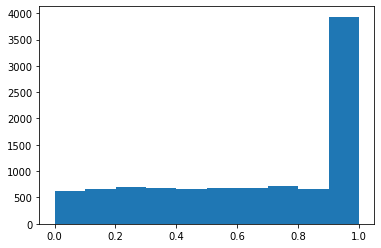

In [12]:
order_no = range(n)
style_color = range(m)

# assign a return rate to each product with mean the given parameters. This turns out to be hard might
def get_truncated_normal(n=1, mean=0, sd=1, low=0, upp=1):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(n)

return_rate = get_truncated_normal(m, mean=0.5, sd = 1)
return_rate_multi = return_rate * 1.5
return_rate_multi = np.minimum(return_rate_multi, 1)
plt.hist(return_rate_multi)

In [13]:
print("The average return rate of a single product: %f" % return_rate.mean())
print("The standard derivation of return rate: %f" % return_rate.std())

The average return rate of a single product: 0.495509
The standard derivation of return rate: 0.283265


In [14]:
print("The average return rate of a product if included purchased multi times in a basket: %f" % return_rate_multi.mean())
print("The corresponding standard derivation: %f" % return_rate_multi.std())

The average return rate of a product if included purchased multi times in a basket: 0.665332
The corresponding standard derivation: 0.330265


In [15]:
# generate purchas basket-product pair. This is done for each basket.
np.random.seed(1)
pair = list()
for i in range(n):
    num_purchase = np.random.random_integers(1, 10) # randomly select number of product to purhcase
    products = np.random.choice(m, num_purchase, replace=False)
    num_products = np.random.choice(range(1,4), num_purchase, replace=True, p=[0.6, 0.3, 0.1]) # for each product, randomly choose number of purchase
    returns = np.stack([np.random.binomial(1, return_rate[products[j]] if num_products[j] == 1 else return_rate_multi[products[j]], 1)[0]
                       for j in range(num_purchase)])
    pair.append(np.vstack([np.repeat(i, num_purchase), products, num_products, returns]).T)

pair = np.vstack(pair)
h = sparse.coo_matrix((pair[:,2], (pair[:,0], pair[:,1])), shape=(n, m))
r = sparse.coo_matrix((pair[:,3], (pair[:,0], pair[:,1])), shape=(n, m))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  """


In [16]:
h = h.tocsr()
r = r.tocsr()

In [20]:
h_unif = h.sign()
# print(h_unif)
r_unif = r.sign()
# print(r_unif)

In [21]:
with open("../data/order_no.pkl", 'wb') as f:
    pickle.dump(order_no, f)
with open('../data/style_color.pkl', 'wb') as f:
    pickle.dump(style_color, f)
with open('../data/h_mat.pkl', 'wb') as f:
    pickle.dump(h, f)
with open('../data/r_mat.pkl', 'wb') as f:
    pickle.dump(r, f)
# For Hypergraph w/o Labels
with open('../data/h_unif_mat.pkl', 'wb') as f:
    pickle.dump(h_unif, f)
with open('../data/r_unif_mat.pkl', 'wb') as f:
    pickle.dump(r_unif, f)

In [22]:
print("number of returns over purchase: {0:.0%}".format(float(sum(pair[:,3]))/sum(pair[:,2]>0)))

number of returns over purchase: 56%
